# Categorización de estudiantes basado en Características  Familiares 

## Introducción

### Contexto

En el campo de la educación, es de gran interés comprender qué factores pueden influir en el rendimiento académico de los estudiantes. Esta información es valiosa tanto para los educadores como para los propios estudiantes, ya que les permite identificar áreas de mejora y tomar medidas para maximizar su éxito académico. Con el avance de las técnicas de aprendizaje automático, ahora podemos aprovechar estas herramientas para realizar predicciones basadas en datos y obtener una visión más precisa sobre los resultados académicos.

### Objetivo

El objetivo principal de este proyecto es desarrollar un modelo de aprendizaje de máquina no supervisado capaz de categorizar a los estudiantes en función de una serie de características familiares recopiladas a través de una encuesta. El conjunto de datos utilizado para este estudio consta de 145 instancias, cada una correspondiente a las respuestas de un estudiante en particular. 

### Metodología

Para alcanzar nuestro objetivo, seguiremos los siguientes pasos:

1. Preparación de los datos: Cargaremos el conjunto de datos y realizaremos las tareas necesarias para garantizar que los datos sean adecuados para su procesamiento.
2. Análisis exploratorio de datos: Realizaremos una exploración inicial de los datos para comprender mejor su distribución, relaciones y posibles patrones.
3. Preprocesamiento de datos: Realizaremos transformaciones y limpieza de los datos para asegurarnos de que sean adecuados para el entrenamiento del modelo.
4. Selección y entrenamiento del modelo: Seleccionaremos algunos algoritmos de aprendizaje de máquina no supervisado y entrenaremos los modelos utilizando el conjunto de datos preparado.
5. Evaluación del modelo: Evaluaremos el rendimiento de los modelos utilizando métricas adecuadas y técnicas de validación cruzada, para así seleccionar el más óptimo.
6. Predicciones: Utilizaremos el modelo entrenado para realizar predicciones sobre nuevos datos y analizaremos los resultados obtenidos.

A través de este estudio, esperamos obtener un modelo preciso que pueda categorizar de manera correcta a los estudiantes en función de las características proporcionadas. Esto proporcionará una herramienta útil tanto para los educadores como para los propios estudiantes, permitiéndoles tomar decisiones informadas para mejorar su rendimiento académico.

## Import de librerías necesarias y archivo

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('hespe-data.csv', sep=";")

In [3]:
dataset = df[['student_id', 'mother_ed', 'farther_ed', 'siblings', 'parental_status', 'mother_occup', 'father_occup']]

## Análisis exploratorio inicial

Las variables iniciales de nuestro dataset son:
1. student_id
2. mother_ed - Mother's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
3. farther_ed - Father's education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)
4. siblings - Number of sisters/brothers (if available): (1: 1, 2:, 2, 3: 3, 4: 4, 5: 5 or above)
5. parental_status - Parental status: (1: married, 2: divorced, 3: died - one of them or both)
6. mother_occup - Mother's occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)
7. father_occup - Father's occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)


In [4]:
dataset.head(5)

,student_id,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup
0,STUDENT1,1,2,3,1,2,5
1,STUDENT2,2,3,2,1,2,1
2,STUDENT3,2,2,2,1,2,1
3,STUDENT4,1,2,5,1,2,1
4,STUDENT5,3,3,2,1,2,4


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       145 non-null    object
 1   mother_ed        145 non-null    int64 
 2   farther_ed       145 non-null    int64 
 3   siblings         145 non-null    int64 
 4   parental_status  145 non-null    int64 
 5   mother_occup     145 non-null    int64 
 6   father_occup     145 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 8.1+ KB


In [6]:
dataset.duplicated().sum()

0

### Datos faltantes y nulos

In [7]:
dataset.isna().sum()

student_id         0
mother_ed          0
farther_ed         0
siblings           0
parental_status    0
mother_occup       0
father_occup       0
dtype: int64

In [8]:
dataset.isnull().sum()

student_id         0
mother_ed          0
farther_ed         0
siblings           0
parental_status    0
mother_occup       0
father_occup       0
dtype: int64

In [9]:
dataset['parental_status'].value_counts()

1    127
2     11
3      7
Name: parental_status, dtype: int64

In [10]:
dataset['siblings'].value_counts()

2    45
1    27
3    26
5    24
4    23
Name: siblings, dtype: int64

Tras una revisión exhaustiva de las columnas del conjunto de datos, no se identificaron valores nulos o faltantes en ninguna de ellas. Esto indica que el conjunto de datos está completo y no requiere ningún tratamiento adicional para manejar valores faltantes.

### Data Wrangling

Al revisar las columnas y sus tipos de entrada, se observa la presencia de varias variables categóricas en el conjunto de datos. Con el objetivo de preparar adecuadamente nuestros datos para el modelo de aprendizaje de máquina, procederemos a clasificar las variables y luego procesaremos las variables categóricas de tal modo que puedan ser utilizadas en nuestro modelo. Este procesamiento puede incluir técnicas como la binarización o la creación de variables ficticias (dummy variables) para representar las categorías de manera numérica, lo cual permitirá una mejor interpretación por parte del modelo.

#### Columna: parental_status

In [11]:
dataset['parental_status'] = dataset['parental_status'].apply(lambda x: 'parent_married' if x==1 else 'parent_divorced' if x==2 else 'parent_dead' )

C:\Users\pachi\AppData\Local\Temp\ipykernel_15844\735430347.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['parental_status'] = dataset['parental_status'].apply(lambda x: 'parent_married' if x==1 else 'parent_divorced' if x==2 else 'parent_dead' )


In [12]:
dataset.sample(5)

,student_id,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup
116,STUDENT117,1,1,5,parent_married,2,4
110,STUDENT111,4,4,2,parent_divorced,1,5
44,STUDENT45,1,3,2,parent_married,2,5
99,STUDENT100,3,4,2,parent_married,2,1
57,STUDENT58,4,2,3,parent_married,3,3


In [13]:
df_parental_status = pd.get_dummies(dataset['parental_status'])

In [14]:
df_parental_status.sum()

parent_dead          7
parent_divorced     11
parent_married     127
dtype: int64

In [15]:
dataset = pd.concat([dataset,df_parental_status], axis=1)

In [16]:
dataset

,student_id,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup,parent_dead,parent_divorced,parent_married
0,STUDENT1,1,2,3,parent_married,2,5,0,0,1
1,STUDENT2,2,3,2,parent_married,2,1,0,0,1
2,STUDENT3,2,2,2,parent_married,2,1,0,0,1
3,STUDENT4,1,2,5,parent_married,2,1,0,0,1
4,STUDENT5,3,3,2,parent_married,2,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,1,2,2,parent_divorced,2,4,0,1,0
141,STUDENT142,1,1,5,parent_married,2,1,0,0,1
142,STUDENT143,3,4,4,parent_married,2,4,0,0,1
143,STUDENT144,4,4,1,parent_married,3,3,0,0,1


In [17]:
dataset.drop(columns=['parental_status','parent_dead'], inplace=True)

In [18]:
dataset.sample(5)

,student_id,mother_ed,farther_ed,siblings,mother_occup,father_occup,parent_divorced,parent_married
108,STUDENT109,1,2,1,1,5,0,0
56,STUDENT57,1,3,5,2,4,0,1
122,STUDENT123,3,3,2,2,1,0,1
98,STUDENT99,2,4,2,2,5,0,1
136,STUDENT137,3,3,3,3,4,0,1


#### Columnas: mother_occup, father_occup

In [19]:
dataset['mother_occup'] = dataset['mother_occup'].apply(lambda x: 'mom_retired' if x==1 else 'mom_housewife' if x==2 else 'mom_governmentofficer' if x==3 else 'mom_private_sector_employee' if x== 4 else 'mom_self_employment' if x==5 else 'mom_occup_other')

In [20]:
dataset['father_occup'] = dataset['father_occup'].apply(lambda x: 'dad_retired' if x==1 else  'dad_governmentofficer' if x==2 else 'dad_private_sector_employee' if x== 3 else 'dad_self_employment' if x==4 else 'dad_occup_other')

In [21]:
dataset.sample(5)

,student_id,mother_ed,farther_ed,siblings,mother_occup,father_occup,parent_divorced,parent_married
69,STUDENT70,2,2,2,mom_housewife,dad_private_sector_employee,0,1
92,STUDENT93,3,4,4,mom_governmentofficer,dad_governmentofficer,0,1
40,STUDENT41,2,3,1,mom_housewife,dad_occup_other,0,1
49,STUDENT50,2,3,2,mom_housewife,dad_self_employment,0,1
66,STUDENT67,3,2,5,mom_housewife,dad_occup_other,0,1


In [22]:
df_mother_occup = pd.get_dummies(dataset['mother_occup'])

In [23]:
df_father_occup = pd.get_dummies(dataset['father_occup'])

In [24]:
df_mother_occup.sum()

mom_governmentofficer           16
mom_housewife                  103
mom_private_sector_employee     18
mom_retired                      6
mom_self_employment              2
dtype: int64

In [25]:
df_father_occup.sum()

dad_governmentofficer          22
dad_occup_other                14
dad_private_sector_employee    35
dad_retired                    36
dad_self_employment            38
dtype: int64

In [26]:
dataset = pd.concat([dataset,df_mother_occup], axis=1)

In [27]:
dataset = pd.concat([dataset,df_father_occup],axis=1)

In [28]:
dataset.drop(columns=['dad_occup_other','mom_self_employment', 'mother_occup','father_occup'],inplace=True)

In [29]:
dataset.head(5)

,student_id,mother_ed,farther_ed,siblings,parent_divorced,parent_married,mom_governmentofficer,mom_housewife,mom_private_sector_employee,mom_retired,dad_governmentofficer,dad_private_sector_employee,dad_retired,dad_self_employment
0,STUDENT1,1,2,3,0,1,0,1,0,0,0,0,0,0
1,STUDENT2,2,3,2,0,1,0,1,0,0,0,0,1,0
2,STUDENT3,2,2,2,0,1,0,1,0,0,0,0,1,0
3,STUDENT4,1,2,5,0,1,0,1,0,0,0,0,1,0
4,STUDENT5,3,3,2,0,1,0,1,0,0,0,0,0,1


## Generación del modelo

In [30]:
dataset.columns

Index(['student_id', 'mother_ed', 'farther_ed', 'siblings', 'parent_divorced',
       'parent_married', 'mom_governmentofficer', 'mom_housewife',
       'mom_private_sector_employee', 'mom_retired', 'dad_governmentofficer',
       'dad_private_sector_employee', 'dad_retired', 'dad_self_employment'],
      dtype='object')

In [31]:
X = dataset[['mother_ed', 'farther_ed', 'siblings', 'parent_divorced', 'parent_married', 'mom_governmentofficer', 'mom_housewife', 'mom_private_sector_employee', 'mom_retired', 'dad_governmentofficer', 'dad_private_sector_employee', 'dad_retired', 'dad_self_employment']]

### Escalamiento

In [32]:
scaler = StandardScaler() 
scaler.fit(X)

StandardScaler()

In [33]:
scaled_data = scaler.transform(X)

In [34]:
scaled_data[:5]

array([[-1.05244435, -0.55482123,  0.14241298, -0.28651274,  0.37647348,
        -0.35218036,  0.63856636, -0.37647348, -0.20776301, -0.42292055,
        -0.56407607, -0.57469577, -0.5959364 ],
       [-0.23199042,  0.31962527, -0.59508281, -0.28651274,  0.37647348,
        -0.35218036,  0.63856636, -0.37647348, -0.20776301, -0.42292055,
        -0.56407607,  1.74005108, -0.5959364 ],
       [-0.23199042, -0.55482123, -0.59508281, -0.28651274,  0.37647348,
        -0.35218036,  0.63856636, -0.37647348, -0.20776301, -0.42292055,
        -0.56407607,  1.74005108, -0.5959364 ],
       [-1.05244435, -0.55482123,  1.61740456, -0.28651274,  0.37647348,
        -0.35218036,  0.63856636, -0.37647348, -0.20776301, -0.42292055,
        -0.56407607,  1.74005108, -0.5959364 ],
       [ 0.58846351,  0.31962527, -0.59508281, -0.28651274,  0.37647348,
        -0.35218036,  0.63856636, -0.37647348, -0.20776301, -0.42292055,
        -0.56407607, -0.57469577,  1.67803143]])

### Analisis dimensionalidad con PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA().fit(scaled_data)

In [37]:
pca.explained_variance_ratio_

array([0.23608422, 0.14672568, 0.11379861, 0.10613404, 0.08335085,
       0.08041492, 0.06887438, 0.05629042, 0.04959363, 0.03078174,
       0.01852128, 0.00732657, 0.00210366])

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.23608422, 0.3828099 , 0.49660851, 0.60274254, 0.68609339,
       0.76650831, 0.83538269, 0.89167311, 0.94126674, 0.97204848,
       0.99056976, 0.99789634, 1.        ])

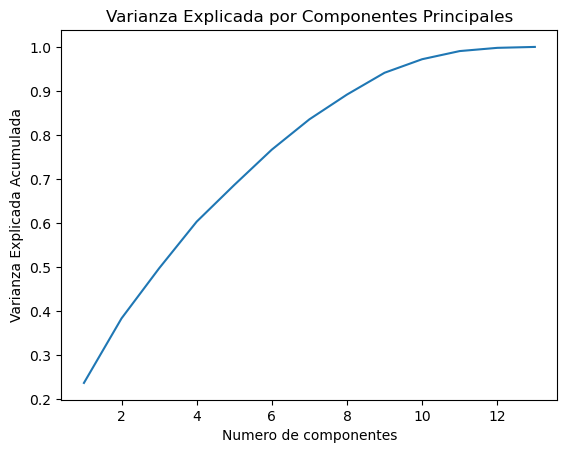

In [39]:
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes Principales')
plt.show()

Reduciré a 9 dimensiones, porque esta cantidad explica un aproximado de 94% de los datos.

### Reducción de dimension

In [40]:
pca2 = PCA(n_components=9)
pca2.fit(scaled_data)
x_pca = pca2.transform(scaled_data)

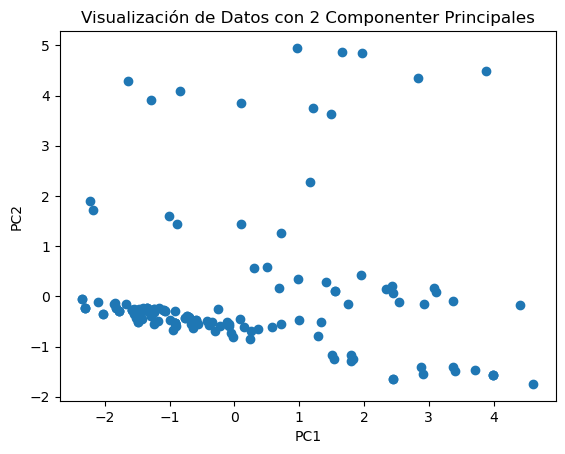

In [41]:
# Visualización de los datos con 2 Componentes
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización de Datos con 2 Componenter Principales')
plt.show()

### Clusterización jerarquica

#### Encontrando el n° de clusters

Primero intentaremos determinar la cantidad de clusters que utilizaremos para el agrupamiento.

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

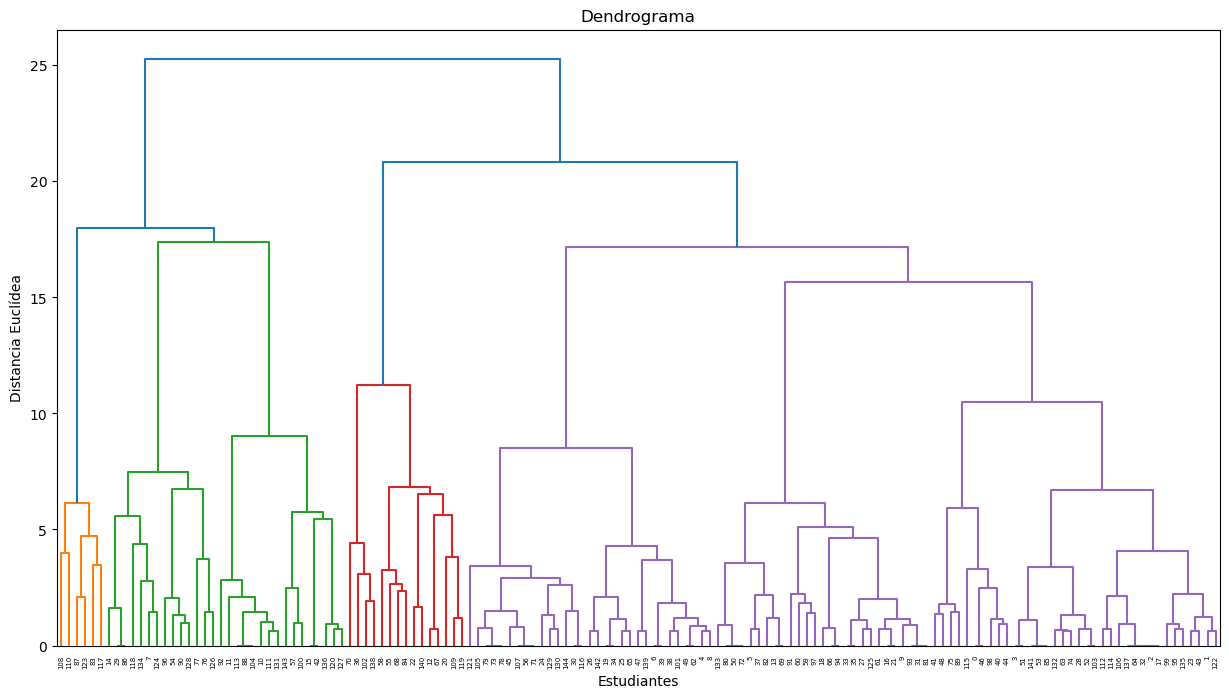

In [43]:
fig = plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(x_pca, method = "ward"))
plt.title("Dendrograma")
plt.xlabel("Estudiantes")
plt.ylabel("Distancia Euclídea")
plt.show()

Aquí se puede observar que la cantidad ideal de clusters es 7. 

![title](CJ2.png)

#### Generando modelo con 7 clusters:

In [44]:
CJ = AgglomerativeClustering(n_clusters = 7, affinity='euclidean', linkage='ward')
y_agrupado = CJ.fit_predict(x_pca)

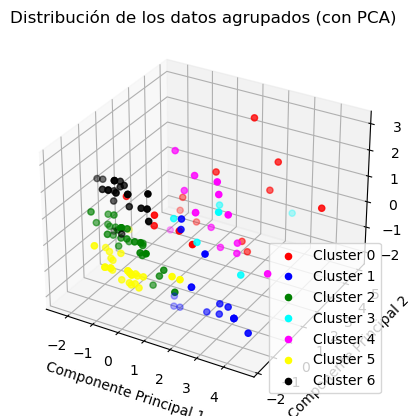

In [46]:
colores = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'peru']
num_clusters = len(np.unique(y_agrupado))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster_label in range(num_clusters):
    ax.scatter(x_pca[y_agrupado == cluster_label, 0],
               x_pca[y_agrupado == cluster_label, 1],
               x_pca[y_agrupado == cluster_label, 2],
               c=colores[cluster_label], label=f'Cluster {cluster_label}')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Distribución de los datos agrupados (con PCA)')
ax.legend()
plt.show()

### k-means

#### Buscando n° de clusters

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

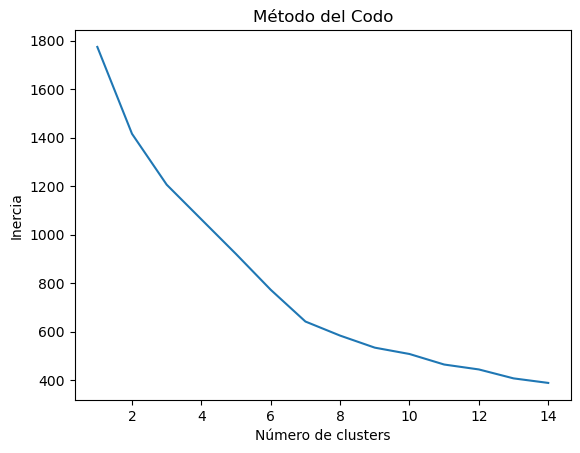

In [48]:
# Método del Codo
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

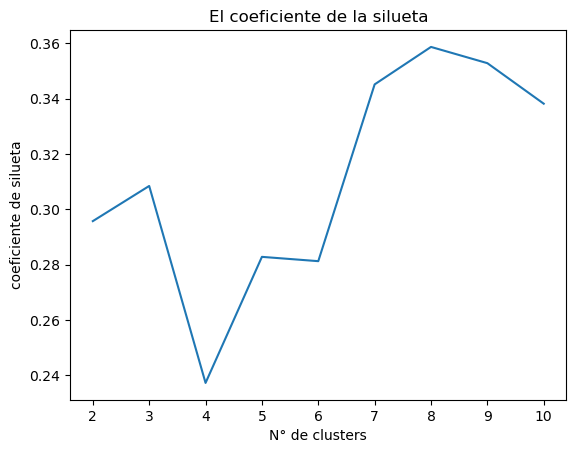

In [49]:
savg = []
for i in range(2,11):
    kmeans2 = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans2.fit(x_pca)
    silhouette_avg = silhouette_score(x_pca,kmeans2.labels_)
    savg.append(silhouette_avg)
plt.plot(range(2,11),savg)
plt.title('El coeficiente de la silueta')
plt.xlabel('N° de clusters')
plt.ylabel('coeficiente de silueta')
plt.show()

Con el método del codo y de la silueta podemos observar que 7 y 8 sirven como n° de clusters ideales. Trabajaremos con 7.

#### Generando modelo con 7 clusters.

In [68]:
kmeans_final = KMeans(n_clusters=7, init = 'k-means++', random_state = 42)
kmeans_final.fit(x_pca)

c:\Users\pachi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [63]:
clases = df['grade']

Grafico con las dos primeras componentes principales:

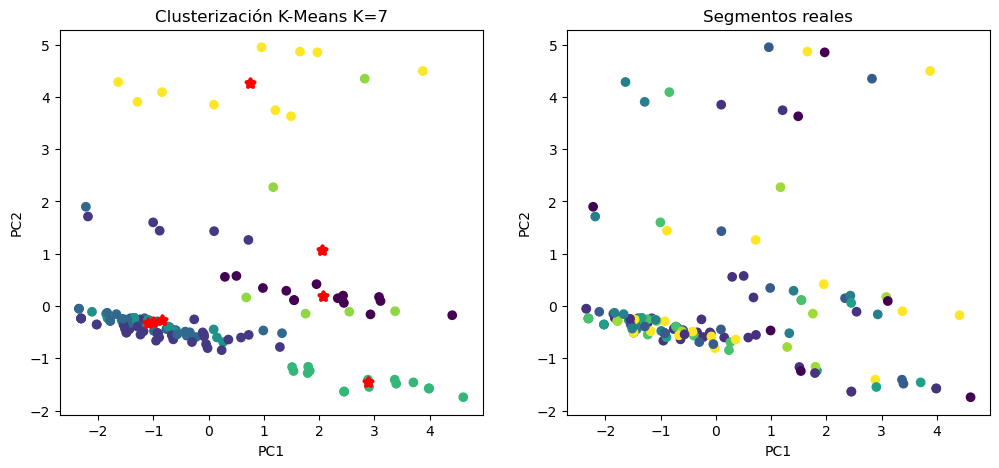

In [69]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Clusterización K-Means K=7')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=kmeans_final.labels_)
plt.scatter(kmeans_final.cluster_centers_[:,0],kmeans_final.cluster_centers_[:,1], c='r', marker='*', lw=3)
plt.subplot(1,2,2)
plt.title('Segmentos reales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['grade'])

Grafico con las tres primeras componentes principales:

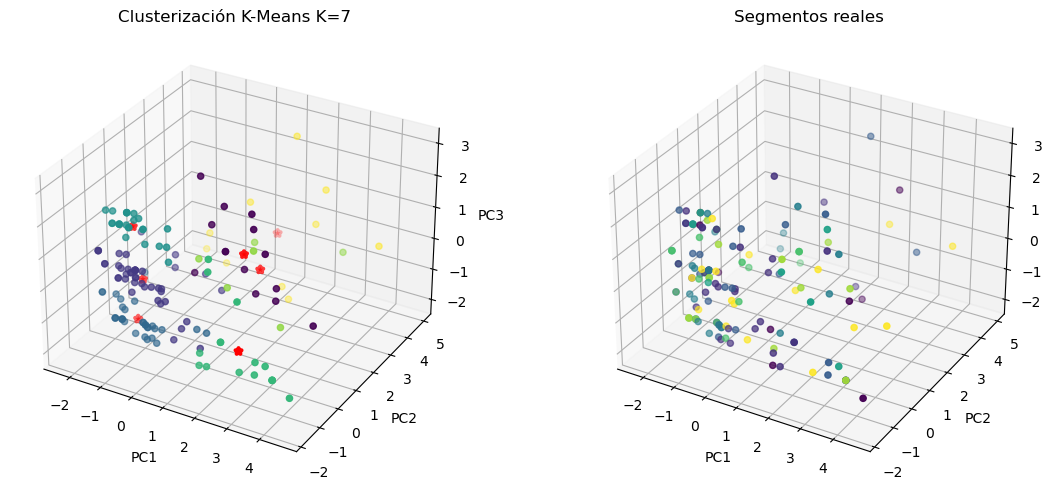

In [70]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Gráfico de clústeres K-means
ax1.set_title('Clusterización K-Means K=7')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=kmeans_final.labels_)
ax1.scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], kmeans_final.cluster_centers_[:, 2],
            c='r', marker='*', lw=3)

# Gráfico de segmentos reales
ax2.set_title('Segmentos reales')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=df['grade'])

plt.tight_layout()
plt.show()

In [71]:
df['grade'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: grade, dtype: int64

In [73]:
etiquetas = pd.DataFrame(kmeans_final.labels_)

In [74]:
etiquetas.value_counts()

1    44
2    31
3    24
4    16
0    14
6    10
5     6
dtype: int64

In [78]:
y_agrupado = kmeans_final.predict(x_pca)

In [83]:
cluster_5_data = dataset[y_agrupado == 5]

In [87]:
cluster_5_data['student_id']

83      STUDENT84
87      STUDENT88
108    STUDENT109
110    STUDENT111
117    STUDENT118
123    STUDENT124
Name: student_id, dtype: object

In [92]:
df['student_id'][df['grade'] == 4]

43      STUDENT44
51      STUDENT52
57      STUDENT58
76      STUDENT77
78      STUDENT79
80      STUDENT81
85      STUDENT86
93      STUDENT94
131    STUDENT132
143    STUDENT144
Name: student_id, dtype: object

## Conclusión y Resultados

En este proyecto, se desarrolló un modelo de aprendizaje de máquina no supervisado para agrupar a los estudiantes. Se aplicaron técnicas de preprocesamiento, análisis exploratorio, análisis de dimensionalidad y reducción de dimensiones con PCA y finalmente se utilizaron los algoritmos de CJ y K-means. 

Aunque es complejo de visualizar por la cantidad final de dimensiones, se generaron *7 cluster* con caracteristicas homogéneas. La cantidad por cada etiqueta sigue un patrón similar a las clases en la columna 'grade', con la diferencia de que en ésta columna hay 8 valores distintos (al hacer el modelo con 8 clusters quedaban de hecho más cercanas las cantidades a las de .value_counts() de la columna 'grades' ). Sería interesante  si los estudiantes que estan en el cluster con etiqueta 5, por ejemplo, tienen calificación 0, pero como se puede ver más arriba, no es así, por esta razón no tengo seguridad de cómo podría llamar cada cluster.